## ECS7024 Statistics for AI and Data Science - Coursework 3
**Table of Contents**

1. Section 1: Introduction
   1. Section 1.1: Outline
   2. Section 1.2: Loading the Data
2. 2.1 Part 1: Load and prepare the data

3. 2.2 Part 2: Trends

4. 2.3 Part 3: Price Changes

5. 2.4 Part 4: Statistical Analysis
   1. Section 5.1: Conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

## Section 1: Introduction

This workbook delves into the analysis of English property prices using a dataset spanning 36 months. Focusing on four property types across different regions, the coursework aims to uncover trends, changes, and patterns in the real estate market. Offering insights into property price dynamics and regional variations.

### Section 1.1: Outline
Section 2.1 loads the data and derives variables to load and prepare the data in each region. Section 2.2 plots distributions of the measures so that the relationship between trends of the prices, considering only flats and detached properties can be understood. In Section 2.3, we use the area data in this section to look at how flat prices have changed. In 2.4 statistical analysis occurs

### Section 1.2: Loading the Data
The data is loaded from a CSV file.

In [2]:
prices = pd.read_csv('average-property-price.csv')
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
location = pd.read_csv('location-codes.csv')

prices.head(5)

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


### 2.1 Part 1: Load and prepare the data

In [3]:
location.head(5)

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


In [4]:
overall = pd.merge(prices, location, left_on=['Code'], right_on=['AuthorityCode'], how='left')
overall = overall[['Area', 'Code','RegionCode', 'RegionName', 'Detached', 'Semi', 'Terraced', 'Flat', 'Month']]


In [5]:
overall.isnull().sum()

Area            0
Code            0
RegionCode    324
RegionName    324
Detached       36
Semi           36
Terraced       20
Flat            0
Month           0
dtype: int64

In [6]:
overall

,Area,Code,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5755,South West,E12000009,NaN,NaN,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,NaN,NaN,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,NaN,NaN,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,NaN,NaN,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [7]:
overall.isnull().sum()

Area            0
Code            0
RegionCode    324
RegionName    324
Detached       36
Semi           36
Terraced       20
Flat            0
Month           0
dtype: int64

In [8]:
# check corresponding null, 

# Filter rows in the 'overall' DataFrame where 'RegionCode' or 'RegionName' is null
null_region_rows = overall[overall['RegionCode'].isnull()] # | overall['RegionName'].isnull()]

# Extract the 'Area' and 'Code' values for those rows and convert them to a list of dictionaries
code_list = null_region_rows['Code'].tolist()
matching_rows_location = location[location['AuthorityCode'].isin(code_list)]

# corresponding_area_code_list = null_region_rows[['Area', 'Code']].to_dict(orient='records')

# Create a DataFrame from the list
# corresponding_df = pd.DataFrame(corresponding_area_code_list)

# Merge with the 'location' DataFrame based on 'Area' and 'Code'
# matching_rows = pd.merge(corresponding_df, location, left_on=['Area', 'Code'], right_on=['AuthorityName', 'AuthorityCode'], how='left')

# matching_rows.isnull().sum()
matching_rows_location

,AuthorityCode,AuthorityName,RegionCode,RegionName


In [9]:
overall = overall.dropna(subset=['RegionCode', 'RegionName'])
overall.isnull().sum()

Area           0
Code           0
RegionCode     0
RegionName     0
Detached      36
Semi          36
Terraced      20
Flat           0
Month          0
dtype: int64

In [10]:
overall = overall.dropna(subset=['Semi', 'Terraced','Detached']) #  number of missing values is small and their impact on the analysis is negligible
overall.isnull().sum()

Area          0
Code          0
RegionCode    0
RegionName    0
Detached      0
Semi          0
Terraced      0
Flat          0
Month         0
dtype: int64

In [11]:
overall

,Area,Code,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [12]:
area= overall[['Area', 'Code','Detached', 'Semi', 'Terraced', 'Flat', 'Month']]
region = overall[['RegionCode','RegionName', 'Detached', 'Semi', 'Terraced', 'Flat', 'Month']]

In [13]:
area.head(5)

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


In [14]:
region

,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### 2.2 Part 2: Trends

The plotted trends of flat and detached property prices across the 9 regions over 36 months provide a comprehensive visual analysis. The selected plots offer a clear comparison between property types, regions, and seasonal variations. Patterns and variations become apparent, allowing for insights into regional housing market dynamics and potential factors influencing price trends. This analysis facilitates an understanding of the real estate market.

In [15]:
region

,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


This graph plots monthly average trends for detached and flat property prices over 36 months. Visual comparison enables easy identification of trends and patterns in both property types over time.

C:\Users\steph\AppData\Local\Temp\ipykernel_9600\81279248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['Month'] = pd.to_datetime(region['Month'])
C:\Users\steph\AppData\Local\Temp\ipykernel_9600\81279248.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = region.resample('M', on='Month').mean()


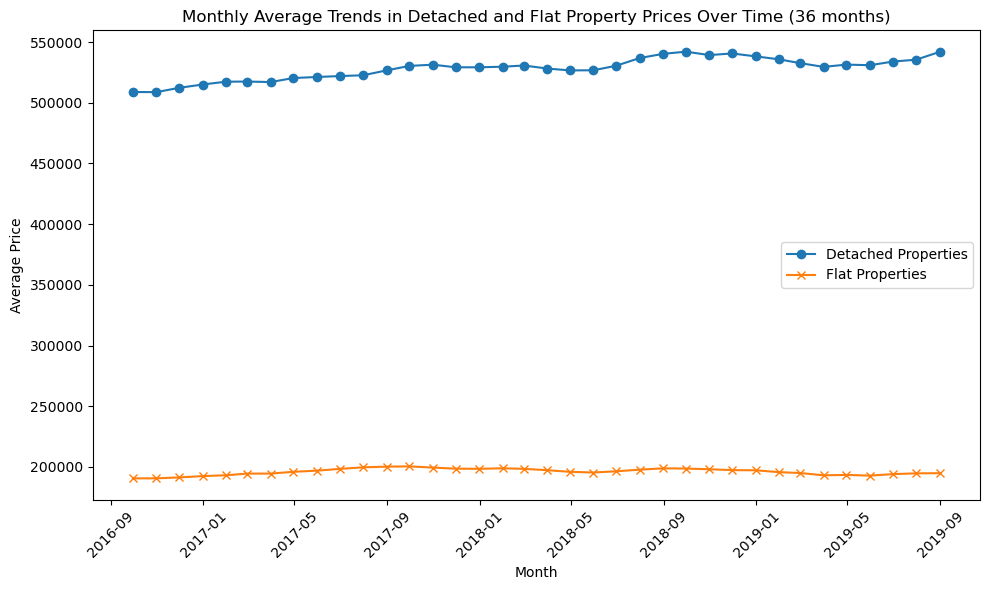

In [16]:
# Convert 'Month' column to datetime format
region['Month'] = pd.to_datetime(region['Month'])

# Filter data for the specified 36 months
start_date = '2016-09-01'
end_date = '2019-08-01'
df_filtered = region[(region['Month'] >= start_date) & (region['Month'] <= end_date)]

# Monthly Averages
monthly_avg = region.resample('M', on='Month').mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Detached'], label='Detached Properties', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Flat'], label='Flat Properties', marker='x')
plt.title('Monthly Average Trends in Detached and Flat Property Prices Over Time (36 months)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This graph plots yearly average trends for detached and flat property prices over 36 months.

C:\Users\steph\AppData\Local\Temp\ipykernel_9600\1309051084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['Month'] = pd.to_datetime(region['Month'])
C:\Users\steph\AppData\Local\Temp\ipykernel_9600\1309051084.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = df_filtered.resample('Y', on='Month').mean()


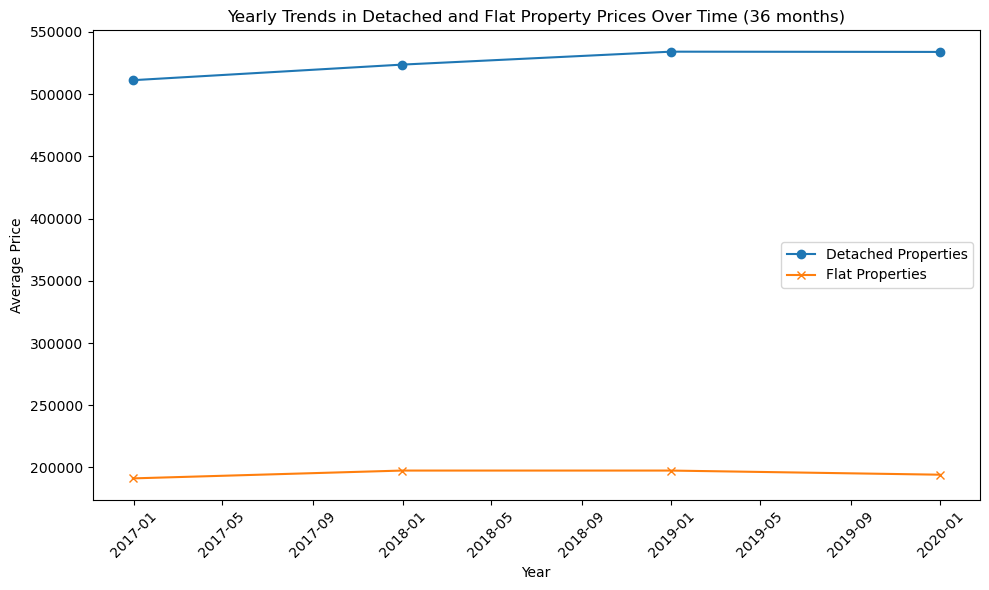

In [17]:

import matplotlib.dates as mdates

# Convert 'Month' column to datetime format
region['Month'] = pd.to_datetime(region['Month'])

# Filter data for the specified 36 months
start_date = '2016-09-01'
end_date = '2019-08-01'
df_filtered = region[(region['Month'] >= start_date) & (region['Month'] <= end_date)]

# Yearly Trends avearage on mean
yearly_avg = df_filtered.resample('Y', on='Month').mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot trends for detached properties
plt.plot(yearly_avg.index, yearly_avg['Detached'], label='Detached Properties', marker='o')

# Plot trends for flat properties
plt.plot(yearly_avg.index, yearly_avg['Flat'], label='Flat Properties', marker='x')

# Customise the plot
plt.title('Yearly Trends in Detached and Flat Property Prices Over Time (36 months)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()

# Use a custom date formatter to show the midpoints of each 6-month period
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



The plotted data illustrates trends in property prices across English regions over a 36-month period. The figure showcases monthly average prices for detached and flat properties, providing a comprehensive view of how these values fluctuated in different regions. Each line on the graph represents a specific region, with markers denoting individual data points. The visualisation captures the dynamic nature of property markets, enabling comparisons between regions and property types over time. The distinctive patterns and variations depicted in the graph offer valuable insights into the diverse trajectories of regional property markets in England.

C:\Users\steph\AppData\Local\Temp\ipykernel_9600\2769485747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['Month'] = pd.to_datetime(region['Month'])
C:\Users\steph\AppData\Local\Temp\ipykernel_9600\2769485747.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = df_filtered.groupby(['RegionName', pd.Grouper(key='Month', freq='M')]).mean()


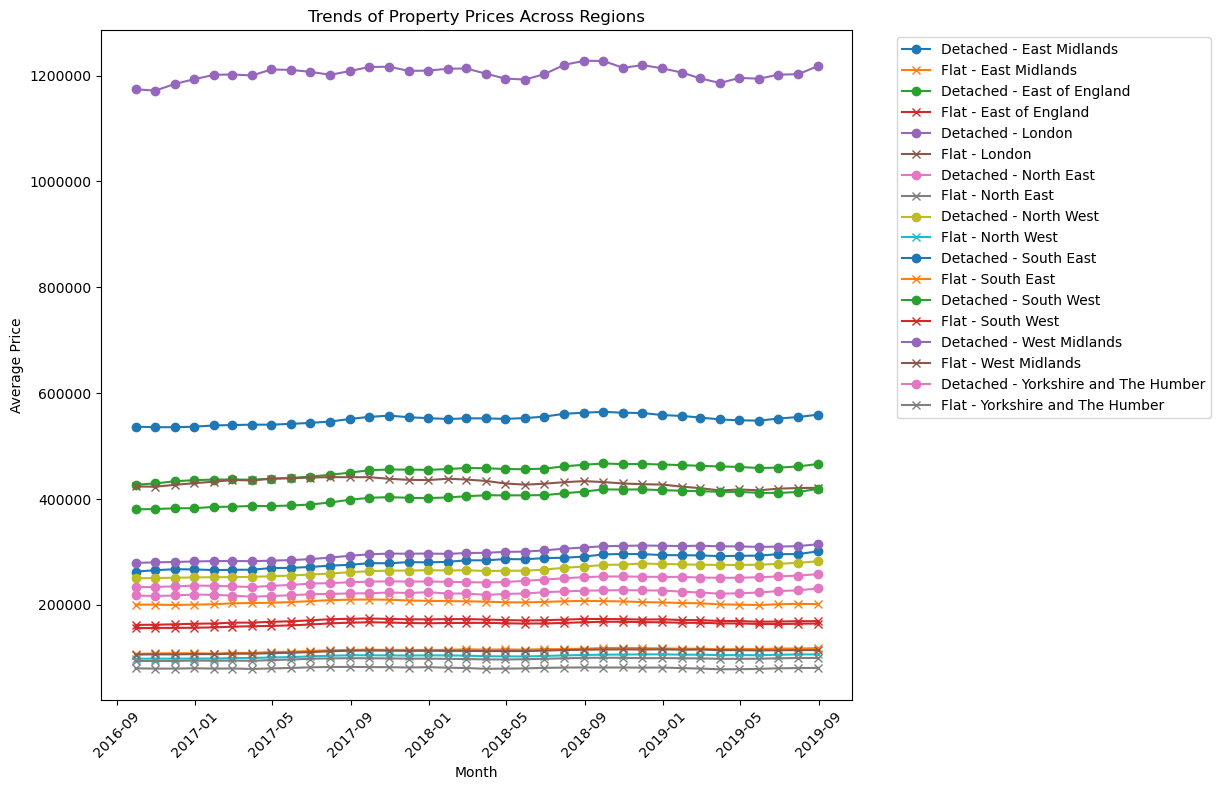

In [18]:

# Convert 'Month' column to datetime format
region['Month'] = pd.to_datetime(region['Month'])

# Filter data for the specified 36 months
start_date = '2016-09-01'
end_date = '2019-08-01'
df_filtered = region[(region['Month'] >= start_date) & (region['Month'] <= end_date)]

# Group by 'RegionName' and 'Month', calculate the mean
monthly_avg = df_filtered.groupby(['RegionName', pd.Grouper(key='Month', freq='M')]).mean()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot trends of detached and flat properties across regions
for region_name, region_data in monthly_avg.groupby('RegionName'):
    plt.plot(region_data.index.get_level_values('Month'), region_data['Detached'], label=f'Detached - {region_name}', marker='o')
    plt.plot(region_data.index.get_level_values('Month'), region_data['Flat'], label=f'Flat - {region_name}', marker='x')

plt.title('Trends of Property Prices Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

plt.show()




Detached houses in London exhibit the widest price range among various property types, significantly surpassing the pricing of other property categories. Notably, the average price for detached houses is nearly double that of flat properties across the dataset. Due to the large volume of data points, the plots are presented as means to effectively capture the overall trends, ensuring a more representative and interpretable visualisation. To enhance the presentation, specific statistical measures, such as median or interquartile range, could be added for specific regions to provide a more comprehensive understanding of the price distribution.

### 2.3 Part 3: Price Changes

Examining flat prices between July 2017 and July 2018 revealed dynamic trends across various regions. Data visualisations showed these changes, offering insights into regional patterns. The observed price shifts provided valuable context, allowing for an interpretation of the housing market dynamics during the specified period.


In [19]:
area.columns

Index(['Area', 'Code', 'Detached', 'Semi', 'Terraced', 'Flat', 'Month'], dtype='object')

In [20]:
area1 = area[['Area', 'Flat', 'Month']]

In [21]:
area2=overall[['RegionName','Area', 'Flat', 'Month']]


In [22]:
area2 = area2.sort_values(by=['Area', 'Month'])
area2 = area2.reset_index(drop=True)
area2

,RegionName,Area,Flat,Month
0,London,Barking and Dagenham,221430.1558,2016-09-01
1,London,Barking and Dagenham,224067.8586,2016-10-01
2,London,Barking and Dagenham,224034.4430,2016-11-01
3,London,Barking and Dagenham,224937.3201,2016-12-01
4,London,Barking and Dagenham,222733.0475,2017-01-01
...,...,...,...,...
5395,Yorkshire and The Humber,York,169297.6199,2019-04-01
5396,Yorkshire and The Humber,York,166894.6036,2019-05-01
5397,Yorkshire and The Humber,York,167080.1850,2019-06-01
5398,Yorkshire and The Humber,York,167488.8577,2019-07-01


In [23]:
filtered_area = area2[(area2['Month'] == '2017-07-01') | (area2['Month'] == '2018-07-01')]
filtered_area['Year'] = filtered_area['Month'].dt.year

filtered_area

C:\Users\steph\AppData\Local\Temp\ipykernel_9600\2790792074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_area['Year'] = filtered_area['Month'].dt.year


,RegionName,Area,Flat,Month,Year
10,London,Barking and Dagenham,233026.92790,2017-07-01,2017
22,London,Barking and Dagenham,230318.11740,2018-07-01,2018
46,London,Barnet,403492.77130,2017-07-01,2017
58,London,Barnet,393139.28910,2018-07-01,2018
82,Yorkshire and The Humber,Barnsley,73054.06885,2017-07-01,2017
...,...,...,...,...,...
5314,West Midlands,Wolverhampton,84689.21896,2018-07-01,2018
5338,West Midlands,Worcestershire,127758.55150,2017-07-01,2017
5350,West Midlands,Worcestershire,127751.56660,2018-07-01,2018
5374,Yorkshire and The Humber,York,170189.00160,2017-07-01,2017


In [24]:
area_2017 = filtered_area[filtered_area['Year']==2017]
# area_2017.rename(columns={'Month': 'Month_2017'}, inplace=True)
# area_2017.rename(columns={'Flat': 'Flat_2017'}, inplace=True)

area_2017

,RegionName,Area,Flat,Month,Year
10,London,Barking and Dagenham,233026.92790,2017-07-01,2017
46,London,Barnet,403492.77130,2017-07-01,2017
82,Yorkshire and The Humber,Barnsley,73054.06885,2017-07-01,2017
118,South West,Bath and North East Somerset,242441.16080,2017-07-01,2017
154,East of England,Bedford,167562.35620,2017-07-01,2017
...,...,...,...,...,...
5230,North West,Wirral,102486.68380,2017-07-01,2017
5266,South East,Wokingham,233806.26640,2017-07-01,2017
5302,West Midlands,Wolverhampton,81530.88640,2017-07-01,2017
5338,West Midlands,Worcestershire,127758.55150,2017-07-01,2017


In [25]:
area_2018 = filtered_area[filtered_area['Year']==2018]

# area_2018.rename(columns={'Flat': 'Flat_2018'}, inplace=True)
# area_2018.rename(columns={'Month': 'Month_2018'}, inplace=True)

area_2018

,RegionName,Area,Flat,Month,Year
22,London,Barking and Dagenham,230318.11740,2018-07-01,2018
58,London,Barnet,393139.28910,2018-07-01,2018
94,Yorkshire and The Humber,Barnsley,75808.74698,2018-07-01,2018
130,South West,Bath and North East Somerset,247866.66800,2018-07-01,2018
166,East of England,Bedford,169497.10010,2018-07-01,2018
...,...,...,...,...,...
5242,North West,Wirral,103254.08380,2018-07-01,2018
5278,South East,Wokingham,228119.70330,2018-07-01,2018
5314,West Midlands,Wolverhampton,84689.21896,2018-07-01,2018
5350,West Midlands,Worcestershire,127751.56660,2018-07-01,2018


In [26]:
totalarea=pd.merge(area_2017, area_2018, how='outer', on=['Area','RegionName'], suffixes=('_2017', '_2018'))
totalarea=totalarea[['RegionName','Area', 'Flat_2017','Flat_2018']]
totalarea

,RegionName,Area,Flat_2017,Flat_2018
0,London,Barking and Dagenham,233026.92790,230318.11740
1,London,Barnet,403492.77130,393139.28910
2,Yorkshire and The Humber,Barnsley,73054.06885,75808.74698
3,South West,Bath and North East Somerset,242441.16080,247866.66800
4,East of England,Bedford,167562.35620,169497.10010
...,...,...,...,...
145,North West,Wirral,102486.68380,103254.08380
146,South East,Wokingham,233806.26640,228119.70330
147,West Midlands,Wolverhampton,81530.88640,84689.21896
148,West Midlands,Worcestershire,127758.55150,127751.56660


The line adds a 'PriceChange' column to the DataFrame, indicating the difference in flat prices between 2017 and 2018 for each area.

In [27]:
totalarea['PriceChange']=totalarea['Flat_2018']-totalarea['Flat_2017']
totalarea.columns

area_change = totalarea[['Area', 'Flat_2017', 'Flat_2018', 'PriceChange']]
area_change

,Area,Flat_2017,Flat_2018,PriceChange
0,Barking and Dagenham,233026.92790,230318.11740,-2708.81050
1,Barnet,403492.77130,393139.28910,-10353.48220
2,Barnsley,73054.06885,75808.74698,2754.67813
3,Bath and North East Somerset,242441.16080,247866.66800,5425.50720
4,Bedford,167562.35620,169497.10010,1934.74390
...,...,...,...,...
145,Wirral,102486.68380,103254.08380,767.40000
146,Wokingham,233806.26640,228119.70330,-5686.56310
147,Wolverhampton,81530.88640,84689.21896,3158.33256
148,Worcestershire,127758.55150,127751.56660,-6.98490


In [28]:
region_change = totalarea[['RegionName', 'Flat_2017', 'Flat_2018', 'PriceChange']]
region_change = region_change.groupby('RegionName')[['Flat_2017', 'Flat_2018','PriceChange']].sum()
region_change

,Flat_2017,Flat_2018,PriceChange
RegionName,,,
East Midlands,1.029275e+06,1.049072e+06,19797.04553
East of England,1.903743e+06,1.894744e+06,-8998.93580
London,1.412647e+07,1.382111e+07,-305367.87030
North East,9.928296e+05,9.792001e+05,-13629.45084
North West,2.392405e+06,2.406033e+06,13628.15432
South East,3.971166e+06,3.930915e+06,-40250.81090
South West,2.476542e+06,2.489795e+06,13252.57110
West Midlands,1.574736e+06,1.605233e+06,30497.12348
Yorkshire and The Humber,1.485203e+06,1.487251e+06,2048.01289


The code creates two horizontal bar charts: one for comparing flat prices in 2017 and 2018 across regions and another for visualising the price changes in each region during this period. The charts are designed to display clear insights into regional variations in flat prices and their changes.

<Figure size 1200x800 with 0 Axes>

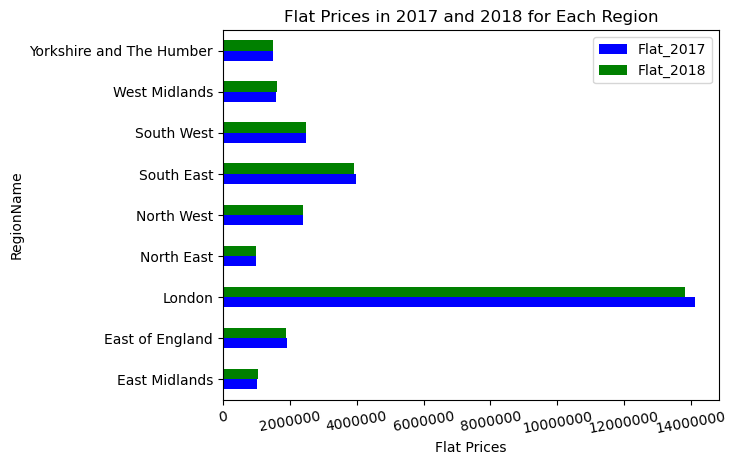

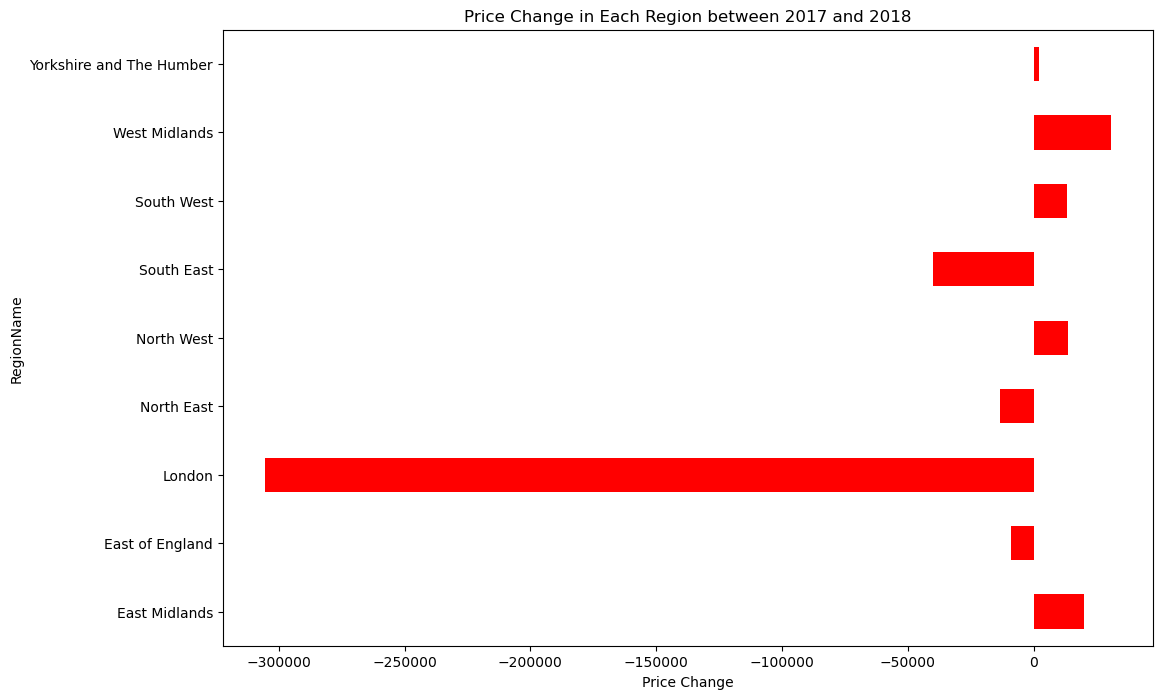

In [29]:
plt.figure(figsize=(12, 8))
region_change[['Flat_2017', 'Flat_2018']].plot(kind='barh', stacked=False, color=['b', 'g'])
plt.yticks(range(len(region_change)), region_change.index)  # Set y-axis ticks to actual region names
plt.xticks(rotation=10) 
plt.gca().get_xaxis().get_major_formatter().set_scientific(False) 
plt.xlabel('Flat Prices')
plt.title('Flat Prices in 2017 and 2018 for Each Region')
plt.show()

# Plotting the horizontal bar chart for price change
plt.figure(figsize=(12, 8))
region_change['PriceChange'].plot(kind='barh', color='r')
plt.yticks(range(len(region_change)), region_change.index)  # Set y-axis ticks to actual region names
plt.xlabel('Price Change')
plt.title('Price Change in Each Region between 2017 and 2018')
plt.show()

Based on the charts, certain patterns emerge. The first chart shows notable disparities in flat prices among regions, with London exhibiting the highest prices in both years. In contrast, the second chart illustrating price changes exposes regional variations in price changes, such as significant declines in London and the South East. These patterns suggest localized economic influences impacting both initial prices and subsequent changes, emphasising the need for region-specific analyses in understanding the housing market dynamics.

The bar charts displays varied trends in regional flat prices from 2017 to 2018. Some regions show noticeable increases such as South East and East of Endgland, while others witness declines such as West Midlands and East Midlands, showing the diverse economic influences on housing markets. This regional contrast underscores the significance of local factors like employment trends and economic growth in shaping housing dynamics.


### 2.4 Part 4: Statistical Analysis

The assumption that regions would exhibit similar trends in flat price changes was not substantiated by the G-test results and P-value, suggesting that the observed variations might be due to random factors rather than significant regional differences. To explore the possibility of achieving a more balanced distribution of price changes across regions, 

To better ascertain the significance of the observed differences in the number of areas with increasing and decreasing flat prices across regions, a larger sample size or a more detailed study could have been conducted. A larger dataset might provide more statistical power to detect meaningful patterns and yield more reliable results. Additionally, examining additional factors that could influence flat prices in each region, such as economic indicators, housing market conditions, or demographic trends, could contribute to a more comprehensive analysis. 

However, with the available data, the results suggest caution in drawing definitive conclusions about regional differences in response to changes in flat prices.

In [30]:
region_change.columns

Index(['Flat_2017', 'Flat_2018', 'PriceChange'], dtype='object')

In [ ]:
region_change.reset_index(inplace=True)
cross_tab = pd.crosstab(index=region_change['RegionName'], columns=region_change['PriceChangeCategory'], margins=True, margins_name="Total")
print(cross_tab)

In [ ]:
cross_tab = pd.crosstab(index=region_change['RegionName'], columns=region_change['PriceChangeCategory'], margins=True, margins_name="Total")

test_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab, correction=False, lambda_='log-likelihood')

print('The G test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

The chi-square test results indicate a G-test statistic of 12.37 with a p-value of 82.782%. The G-test statistic suggests variance in the observed and expected frequencies.The chi-square test results indicate that the changes in flat prices across regions do not show a consistent pattern. The p-value, is relatively high, suggesting that any differences observed might be due to random chance rather than a meaningful trend. Therefore, it's difficult to confidently say that the regions significantly differ in how flat prices have changed. The test doesn't provide strong evidence to support distinct patterns in the way flat prices vary across different areas; these changes could be more random than systematic.

### Section 5.1: Conclusions

Our exploration of English property price data uncovered dynamic trends, revealing distinct patterns in regions and property types. 
Visual analysis, including bar charts that showed price fluctuations and monthly/ yearly trends, which showed valuable insights into the dynamic property market. 

The cross-tabulations systematically showed the distribution of price changes across diverse regions, shedding light on regional responsiveness to fluctuating property values. The incorporation of the G-test statistical analysis showed  qualitative observations with quantitative validation, making it difficult to confidently say that the regions significantly differ in how flat prices have changed. 

However, it is important to acknowledge the inherent limitations of the analytical approach used. The simplicity of classification methodology and the absence of explicit labels for accurate categorization pose constraints on the depth of our analysis. A more extensive evaluation, incorporating diverse datasets and refined methodologies, is needed to elevate understanding of the multifaceted dynamics governing property prices in England.

As we navigate this complex landscape, future iterations of our analysis should consider a more holistic approach, integrating additional  data and embracing advanced statistical techniques to unravel the intricacies of regional property markets.

